In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = pd.read_excel('AIDSVu_State_PrEP-Data-Sets_'+str(2013)+'.xlsx',  header = 2, index_col = 0)
df = pd.DataFrame(columns = x.columns)
prep_year_all = list()

In [3]:
for i in range (2012, 2017): 
    df_all = pd.read_excel('AIDSVu_State_PrEP-Data-Sets_'+str(i)+'.xlsx',  header = 2)
    df_dic = df_all.to_dict('records')
    prep_year_all.append(df_dic)

In [6]:
prep_user_year = dict()

In [7]:
for i in range (2012, 2017):
    user = int()
    user_male = int()
    df1 = prep_year_all[i-2012]
    for item in df1:
        user = user + item['State PrEP Users']
        user_male = user_male + item['Male PrEP Users']
    prep_user_year.update({str(i): [user, user_male]})
prep_user_year_df = pd.DataFrame.from_dict(prep_user_year, orient='index', columns = ['National PrEP Usage', 'Male Users'])


In [8]:
prep_user_year_df

,National PrEP Usage,Male Users
2012,8768,4804
2013,12540,7230
2014,27596,20447
2015,59427,49508
2016,77120,71977


Text(0.5,1,'National PrEP Usage')

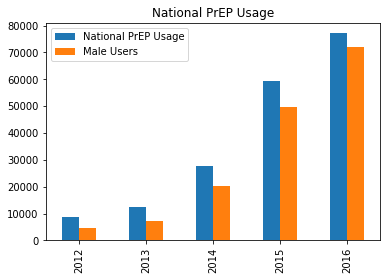

In [9]:
prep_user_year_df.plot(kind='bar')
plt.title('National PrEP Usage')

In [10]:
Northeast = [9, 23, 25, 33, 34, 36, 42, 44, 50]
Midwest = [17, 18, 19, 20, 26, 27, 29, 31, 38, 39, 46, 55]
South = [10, 1, 5, 11, 21, 22, 12, 28, 40, 13, 28, 40, 13, 47, 48, 24, 37, 45, 51, 54]
West = [4, 30, 2, 8, 49, 6, 16, 32, 15, 35, 56, 41, 53]

userne = usermw = usersouth = userw = int()
usernel24 = userne25to34 = userne35to44 = userne45to54 = usernel55 = int()
usermwl24 = usermw25to34 = usermw35to44 = usermw45to54 = usermwl55 = int()
usersouthl24 = usersouth25to34 = usersouth35to44 = usersouth45to54 = usersouthl55 = int()
userwestl24 = userwest25to34 = userwest35to44 = userwest45to54 = userwestl55 = int()
prep_user_region = list()
prep_user_region_age = list()

In [11]:
for i in range (2012, 2017):
    df1 = prep_year_all[i - 2012]
    for item in df1:
        if item['GEO ID'] in Northeast:
            userne = userne + item['State PrEP Users']
            usernel24 = usernel24 + item['Age LE 24 PrEP Users']
            userne25to34 = userne25to34 + item['Age 25-34 PrEP Users']
            userne35to44 = userne35to44 + item['Age 35-44 PrEP Users']
            userne45to54 = userne45to54 + item['Age 45-54 PrEP Users']
            usernel55 = usernel55 + item['Age 55+ PrEP Users']
        elif item['GEO ID'] in Midwest:
            usermw = usermw + item['State PrEP Users']
        elif item['GEO ID'] in South:
            usersouth = usersouth + item['State PrEP Users']
        elif item['GEO ID'] in West:
            userw = userw + item['State PrEP Users']
    prep_user_region.append([userne, usermw, usersouth, userw])
    prep_user_region_age.append([usernel24, userne25to34, userne35to44, userne45to54, usernel55])

Text(0.5,1,'Regional PrEP User per 100,000 Population 2016')

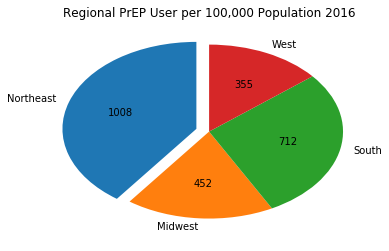

In [12]:
labels = 'Northeast', 'Midwest', 'South', 'West'
prep_user_region_per = list()
explode = (0.1, 0, 0, 0)
for item in prep_user_region:
    prep_user_region_per.append([prep_user_region[4][0]/56.2, prep_user_region[4][1]/67.7, prep_user_region[4][2]/78, prep_user_region[4][3]/119.7 ])
total = sum(prep_user_region_per[0])
plt.pie(prep_user_region_per[0], explode = explode, labels = labels, autopct=lambda p : '{:.0f}'.format(p * total / 100), startangle=90)        
plt.title('Regional PrEP User per 100,000 Population 2016')      


prep user age for midwest catagorized by age

Text(0.5,1,'2016 NorthEast Region PrEP User Catagory: Age')

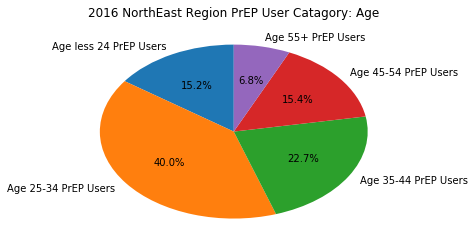

In [13]:

total = sum(prep_user_region_age[4])
labels = 'Age less 24 PrEP Users', 'Age 25-34 PrEP Users', 'Age 35-44 PrEP Users', 'Age 45-54 PrEP Users', 'Age 55+ PrEP Users'
plt.pie(prep_user_region_age[4], labels = labels, autopct='%1.1f%%', startangle=90) 
plt.title('2016 NorthEast Region PrEP User Catagory: Age')

In [14]:
HIV_year_all = list()
for i in range (2008, 2017): 
    df_all = pd.read_excel('AIDSVu_State_New-DX-Data-Sets_'+str(i)+'.xlsx',  header = 2)
    df_dic = df_all.to_dict('records')
    HIV_year_all.append(df_dic)


In [16]:
HIV_diag_year = dict()

for i in range (2008, 2017):
    diag = int()
    diag_MSM = int()
    df1 = HIV_year_all[i-2008]
    for item in df1:
        diag = diag + item['New Diagnoses State Cases']
        diag_MSM = diag_MSM + item['New Diagnoses MSM Cases']
    HIV_diag_year.update({str(i): [i, diag, diag_MSM]})
HIV_diag_year_df = pd.DataFrame.from_dict(HIV_diag_year, orient = 'index', columns = ['Year', 'New Diagnoses State Cases', 'New Diagnoses MSM Cases'])


In [17]:
HIV_diag_year_df


,Year,New Diagnoses State Cases,New Diagnoses MSM Cases
2008,2008,49166,27262
2009,2009,46446,26860
2010,2010,44342,26529
2011,2011,42531,26301
2012,2012,41668,26524
2013,2013,40110,25980
2014,2014,40720,26924
2015,2015,40285,26728
2016,2016,40183,26814


Text(0.5,1,'National New HIV Diagnoses 2008-2016')

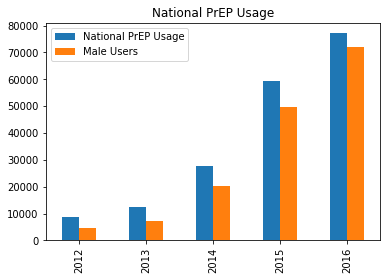

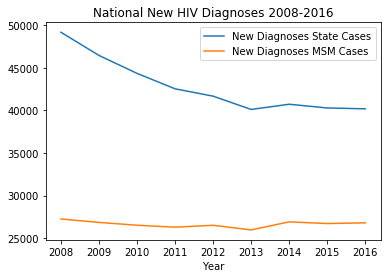

In [18]:
prep_user_year_df.plot(kind='bar')
plt.title('National PrEP Usage')
HIV_diag_year_df.plot(x = 'Year')
plt.title ("National New HIV Diagnoses 2008-2016")

Text(0.5,1,'National New HIV Diagnoses with MSM')

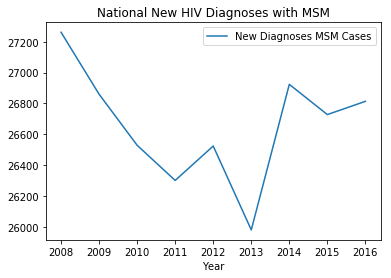

In [19]:
HIV_diag_year_df.plot(x = 'Year', y = 'New Diagnoses MSM Cases')
plt.title('National New HIV Diagnoses with MSM')

In [20]:
HIV_diag_region = dict()
HIV_diag_region_MSM = dict()
diagne = diagmw = diagsouth = diagw = int()
diagneMSM = diagmwMSM = diagsouthMSM = diagwMSM = int()

In [21]:
for i in range (2008, 2017):
    df1 = HIV_year_all[i - 2008]
    for item in df1:
        if item['GEO ID'] in Northeast:
            diagne = diagne + item['New Diagnoses State Rate']
            diagneMSM = diagneMSM + item['New Diagnoses MSM Rate']
        elif item['GEO ID'] in Midwest:
            diagmw = diagmw + item['New Diagnoses State Rate']
            diagmwMSM = diagmwMSM + item['New Diagnoses MSM Rate']
        elif item['GEO ID'] in South:
            diagsouth = diagsouth + item['New Diagnoses State Rate']
            diagsouthMSM = diagsouthMSM + item['New Diagnoses MSM Rate']
        elif item['GEO ID'] in West:
            diagw = diagw + item['New Diagnoses State Rate']
            diagwMSM = diagwMSM + item['New Diagnoses MSM Rate']
    HIV_diag_region.update({str(i):[i, diagne, diagmw, diagsouth, diagw]})
    HIV_diag_region_MSM.update({str(i): [i, diagneMSM, diagmwMSM, diagsouthMSM, diagwMSM]})

In [22]:
HIV_diag_region_df = pd.DataFrame.from_dict(HIV_diag_region, orient = 'index', columns = ['Year', 'Northeast', 'Midwest', 'South', 'West'])
HIV_diag_region_MSM_df = pd.DataFrame.from_dict(HIV_diag_region_MSM, orient = 'index', columns = ['Year', 'Northeast', 'Midwest', 'South', 'West'])

Text(0.5,1,'Regional HIV Diagnoses per 100,000 Population with MSM')

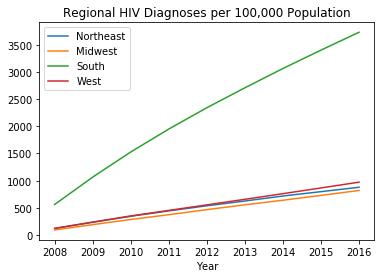

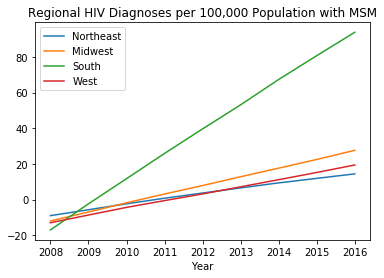

In [23]:
HIV_diag_region_df.plot(x = 'Year')
plt.title('Regional HIV Diagnoses per 100,000 Population')
HIV_diag_region_MSM_df.plot(x = 'Year')
plt.title('Regional HIV Diagnoses per 100,000 Population with MSM')

In [25]:
brx_11 = bk_11 = m_11 = q_11 = st_11 = int()
brx_12 = bk_12 = m_12 = q_12 = st_12 = int()
brx_13 = bk_13 = m_13 = q_13 = st_13 = int()
brx_14 = bk_14 = m_14 = q_14 = st_14 = int()
brx_15 = bk_15 = m_15 = q_15 = st_15 = int()

In [26]:
for  i in range (0, 6005):
    if df.iloc[i][0] == 2011:
        if df.iloc[i][3] == 'Male':
            if df.iloc[i][4] == 'All':
                if df.iloc[i][1] == 'Bronx':
                    brx_11 = brx_11 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Brooklyn':
                    bk_11 = bk_11 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Manhattan':
                    m_11 = m_11 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Queens':
                    q_11 = q_11 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Staten Island':
                    st_11 = st_11 + df.iloc[i][7]
    elif df.iloc[i][0] == 2012:
        if df.iloc[i][3] == 'Male':
            if df.iloc[i][4] == 'All':
                if df.iloc[i][1] == 'Bronx':
                    brx_12 = brx_12 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Brooklyn':
                    bk_12 = bk_12 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Manhattan':
                    m_12 = m_12 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Queens':
                    q_12 = q_12 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Staten Island':
                    st_12 = st_12 + df.iloc[i][7]
    elif df.iloc[i][0] == 2013:
        if df.iloc[i][3] == 'Male':
            if df.iloc[i][4] == 'All':
                if df.iloc[i][1] == 'Bronx':
                    brx_13 = brx_13 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Brooklyn':
                    bk_13 = bk_13 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Manhattan':
                    m_13 = m_13 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Queens':
                    q_13 = q_13 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Staten Island':
                    st_13 = st_13 + df.iloc[i][7]
    elif df.iloc[i][0] == 2014:
        if df.iloc[i][3] == 'Male':
            if df.iloc[i][4] == 'All':
                if df.iloc[i][1] == 'Bronx':
                    brx_14 = brx_14 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Brooklyn':
                    bk_14 = bk_14 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Manhattan':
                    m_14 = m_14 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Queens':
                    q_14 = q_14 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Staten Island':
                    st_14 = st_14 + df.iloc[i][7]
    elif df.iloc[i][0] == 2015:
        if df.iloc[i][3] == 'Male':
            if df.iloc[i][4] == 'All':
                if df.iloc[i][1] == 'Bronx':
                    brx_15 = brx_15 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Brooklyn':
                    bk_15 = bk_15 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Manhattan':
                    m_15 = m_15 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Queens':
                    q_15 = q_15 + df.iloc[i][7]
                elif df.iloc[i][1] == 'Staten Island':
                    st_15 = st_15 + df.iloc[i][7]


In [27]:
nyc_neibor_hiv = dict()
nyc_neibor_hiv.update({2011: [2011, brx_11, bk_11, m_11, q_11, st_11]})
nyc_neibor_hiv.update({2012: [2012, brx_12, bk_12, m_12, q_12, st_12]})
nyc_neibor_hiv.update({2013: [2013, brx_13, bk_13, m_13, q_13, st_13]})
nyc_neibor_hiv.update({2014: [2014, brx_14, bk_14, m_14, q_14, st_14]})
nyc_neibor_hiv.update({2015: [2015, brx_15, bk_15, m_15, q_15, st_15]})

Text(0.5,1,'NYC Borough HIV Male Diagnoses per 100,000 Population')

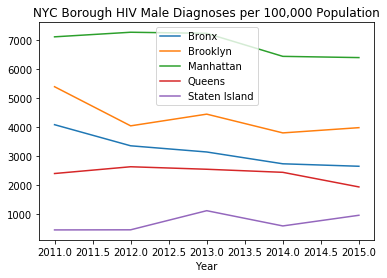

In [28]:
nyc_neibor_hiv_df = pd.DataFrame.from_dict(nyc_neibor_hiv, orient = 'index', columns = ['Year', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
nyc_neibor_hiv_df.plot(x = 'Year')
plt.title('NYC Borough HIV Male Diagnoses per 100,000 Population')

In [29]:
prep_nyc_all = list()

for i in range (2012, 2017): 
    df_all = pd.read_excel(str(i)+'.xlsx',  header = 2)
    df_dic = df_all.to_dict('records')
    prep_nyc_all.append(df_dic)

In [31]:
prep_user_nyc_year = dict()
for i in range (2012, 2017):
    brx= bk = m = q = st = int()
    df1 = prep_nyc_all[i-2012]
    for item in df1:
        if item['Zip3'] == 100:
            m = m + item['Male PrEP Users']
        elif item['Zip3'] == 103:
            st = st + item['Male PrEP Users']
        elif item['Zip3'] == 112:
            bk = bk + item['Male PrEP Users']
        elif item['Zip3'] == 113 or item['Zip3'] == 111:
            q = q + item['Male PrEP Users']
        elif item['Zip3'] == 104:
            brx = brx +item['Male PrEP Users']
    prep_user_nyc_year.update({str(i): [m, st, bk, q, brx]})
prep_user_nyc_year_df = pd.DataFrame.from_dict(prep_user_nyc_year, orient='index', columns = ['Manhattan', 'Staten Island', 'Brooklyn', 'Queens', 'Bronx'])




Text(0.5,1,'NYC Borough HIV Male Diagnoses per 100,000 Population')

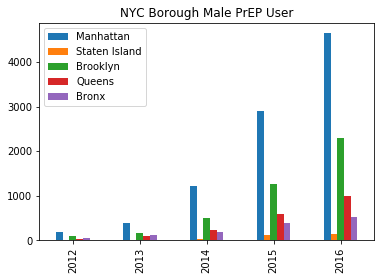

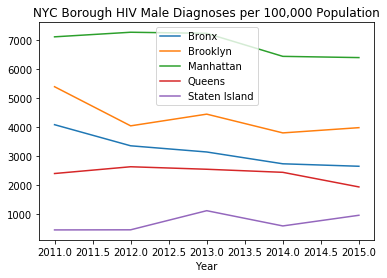

In [32]:
prep_user_nyc_year_df
prep_user_nyc_year_df.plot(kind = 'bar')
plt.title('NYC Borough Male PrEP User')
nyc_neibor_hiv_df = pd.DataFrame.from_dict(nyc_neibor_hiv, orient = 'index', columns = ['Year', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'])
nyc_neibor_hiv_df.plot(x = 'Year')
plt.title('NYC Borough HIV Male Diagnoses per 100,000 Population')